# Airline Pricing Strategy Analysis: Optimizing Value for Travel Agency Clients

**Author:** Tiago Simões 

**Date:** February 2026  

**Topic:** Exploratory Data Analysis (EDA) of Airline Revenue Factors

### Project Introduction
This notebook investigates the relationship between flight features and ticket pricing. Using a dataset of 120,000+ records, I've analyzed how timing, amenities, and flight duration influence the market cost of coach and first-class seats.

# Project Overview

In this analysis, I act as a data consultant for a travel agency. The primary objective is to investigate the pricing dynamics of a partner airline to provide data-driven recommendations for clients. By exploring the relationships between flight features—such as duration, timing, and amenities—and ticket costs, this project identifies patterns that help travelers secure the best possible value for their trips.

## Dataset Profile

The analysis utilizes a comprehensive flight dataset covering various service and logistics features:

**Logistics**: miles (distance), hours (duration), delay (take-off delay).

**Pricing**: coach_price (economy ticket average), firstclass_price (first-class ticket average).

**Amenities**: inflight_meal, inflight_entertainment, and inflight_wifi.

**Temporal Factors**: day_of_week, weekend status, and redeye (overnight) status.

## Technical Stack

**Environment**: Python / Jupyter Notebook

**Data Manipulation**: pandas, numpy

**Data Visualization**: seaborn, matplotlib

**Statistical Analysis**: statsmodels

## Phase 1: Market Research - Economy Pricing Analysis
As a first step, we need to understand the distribution of **Coach Ticket Prices**. Knowing the typical price range allows us to advise clients on what constitutes a "fair" price and identify potential outliers or high-value deals.

### Research Questions:
* What is the typical expenditure for a coach ticket?
* How varied are the prices across our flight database?
* Is a **$500 ticket** statistically a "good deal" based on current market data?

   miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2  
Average Coach Ticket Price: $376.59
Median Coach Ticket Price:

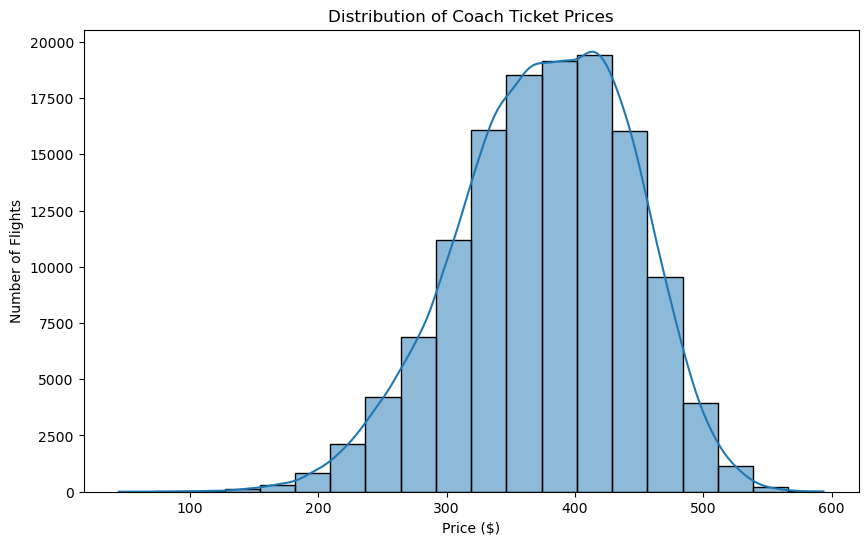

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

## Read in Data
flight = pd.read_csv("flight.csv")
print(flight.head())

# Calculate central tendencies for economy pricing
avg_coach = np.mean(flight.coach_price)
med_coach = np.median(flight.coach_price)

print(f"Average Coach Ticket Price: ${avg_coach:.2f}")
print(f"Median Coach Ticket Price:  ${med_coach:.2f}")

# Visualizing the distribution
plt.figure(figsize=(10, 6))
sns.histplot(flight.coach_price, bins=20, kde=True)
plt.title("Distribution of Coach Ticket Prices")
plt.xlabel("Price ($)")
plt.ylabel("Number of Flights")
plt.show()

### 🔍 Analysis & Insights:

**Market Average**: 

The average coach price is approximately **$376.59**.

**Price Distribution**: 

The data shows a bell-shaped distribution centered around **$380**.

**The $500 Question**: 

A **$500 ticket** is significantly above the mean. Without considering other factors

like distance or urgency, $500 would generally **not** be considered a good deal for a standard coach seat.

## Phase 2: Segment Analysis - The Impact of Flight Duration
Pricing is rarely universal; it is highly dependent on flight length. In this section, we isolate **8-hour flights** to determine if the price distribution shifts significantly for long-haul travel.

### Key Objectives:
* Establish a pricing baseline specifically for long-duration (8-hour) flights.
* Determine if a **$500 ticket** represents better value in the long-haul segment compared to the general market.

8-Hour Flight - Average Price: $431.83
8-Hour Flight - Price Range:   $170.77 - $593.63 = $422.87


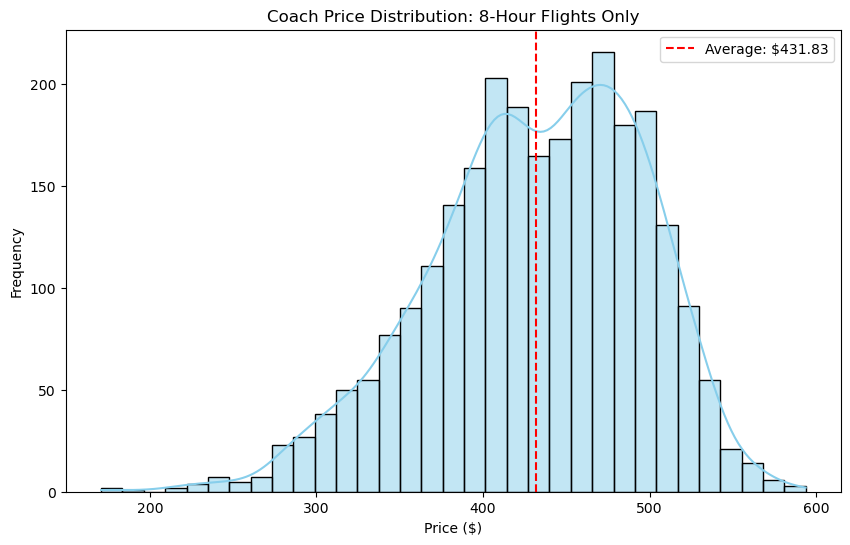

In [11]:
# Filter dataset for 8-hour flights
flights_8hr = flight[flight.hours == 8]

# Calculate statistics for this segment
avg_8hr = np.mean(flights_8hr.coach_price)
min_8hr = np.min(flights_8hr.coach_price)
max_8hr = np.max(flights_8hr.coach_price)
range_8hr = max_8hr - min_8hr

print(f"8-Hour Flight - Average Price: ${avg_8hr:.2f}")
print(f"8-Hour Flight - Price Range:   ${min_8hr:.2f} - ${max_8hr:.2f} = ${range_8hr:.2f}")

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(flights_8hr.coach_price, color='skyblue', kde=True)
plt.axvline(avg_8hr, color='red', linestyle='--', label=f'Average: ${avg_8hr:.2f}')
plt.title("Coach Price Distribution: 8-Hour Flights Only")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

### 🔍 Analysis & Insights: Segment Comparison

**Price Shift:** 

For 8-hour flights, the average price jumps to approximately **$431.83**. This is a significant increase from the general market average.

**The $500 Re-evaluation:**

In the general market, $500 was an extreme outlier.

For 8-hour flights, **$500 is much closer to the average.** While still on the higher end, it is no longer an "unreasonable" price for a long-distance client.
    
**Travel Agency Tip:** 

When clients book long-haul travel (8+ hours), we should set their price expectations roughly **15% higher** than standard regional flights.

## Phase 3: Operational Risk - Flight Delay Distribution
For a travel agency, managing connecting flights is a high-stakes task. A significant delay can cause a client to miss their connection, leading to additional costs and frustration. In this section, we analyze the frequency and scale of delays to better advise clients on "buffer times" needed between flights.

### Analytical Objectives:
* Identify the "Typical" delay length for standard operations.
* Assess the probability of extreme delays that would jeopardize a 1-hour or 2-hour connection.
* Filter data to focus on the most common operational range (delays under 500 minutes) to visualize the bulk of the distribution.

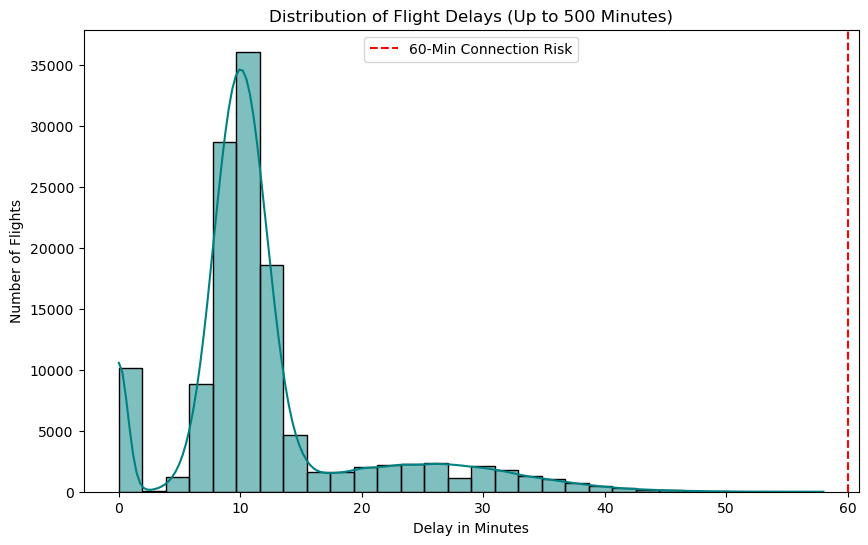

In [17]:
# Filtering for delays under 500 minutes to focus on the most relevant operational data
standard_delays = flight[flight.delay <= 500]

plt.figure(figsize=(10, 6))
sns.histplot(standard_delays.delay, bins=30, kde=True, color='teal')

# Adding a 'Warning Line' for a common 60-minute connection window
plt.axvline(60, color='red', linestyle='--', label='60-Min Connection Risk')

plt.title("Distribution of Flight Delays (Up to 500 Minutes)")
plt.xlabel("Delay in Minutes")
plt.ylabel("Number of Flights")
plt.legend()
plt.show()

### ⚠️ Operational Insights: Connection Safety

**High Reliability:** The vast majority of flights experience **minimal to zero delay**, as seen by the tall peak at the start of the chart.

**The "Safety Zone":** Most delays fall well under 30 minutes. 

**The Danger Zone:** While rare, delays extending beyond **60 minutes** (red dashed line) occur frequently enough that we should discourage "tight" connections of less than 90 minutes for high-priority clients.

**Portfolio Note:** By filtering the data to `delay <= 500`, we removed extreme outliers that would have compressed the chart, allowing us to see the "business-critical" delay patterns more clearly.

## Bivariate Analysis

## Phase 4: Bivariate Analysis - Correlation Between Service Tiers
A key strategy for travel agencies is understanding the "price gap" between Coach and First Class. In this section, we analyze how these two price points move together.

### Analytical Goals:
* **Correlation Check:** Does a high-priced coach ticket always mean a high-priced first-class ticket?
* **Upsell Identification:** Can we identify specific flights where the "upgrade cost" is lower than the market average?

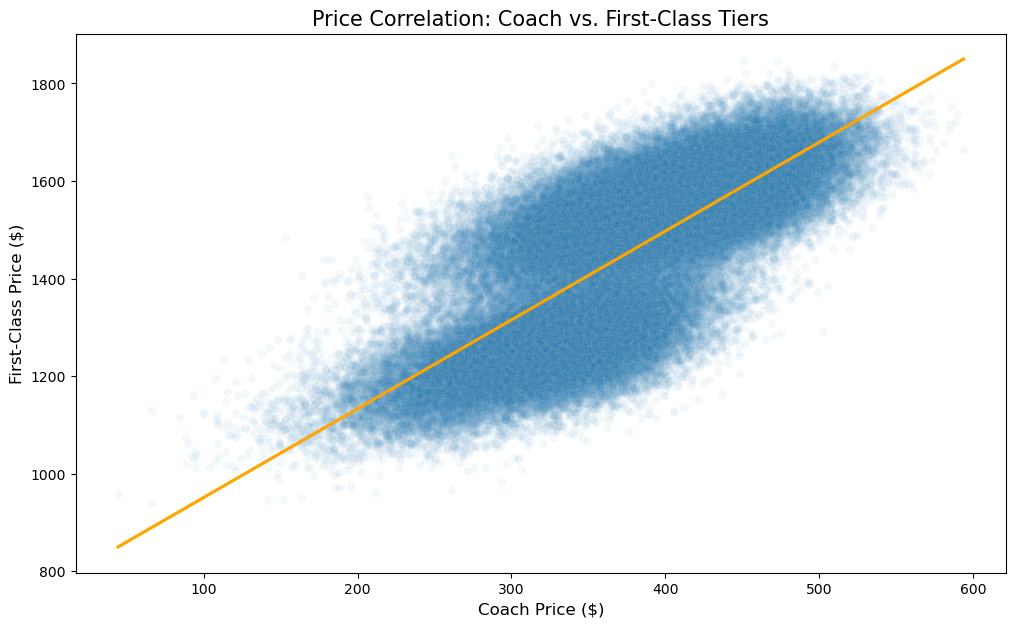

In [29]:
# Create a refined scatter plot
plt.figure(figsize=(12, 7))

# We take 10% of the data to make the scatter plots readable and fast.
flight_sub = flight.sample(n = int(flight.shape[0] * 0.1))

# 'alpha=0.05' makes the dots transparent so we can see where the data is most dense
sns.scatterplot(x='coach_price', y='firstclass_price', data=flight, alpha=0.05)

# Adding a regression line helps show the "Market Standard"
sns.regplot(x='coach_price', y='firstclass_price', data=flight, 
            scatter=False, color='orange', line_kws={'label': 'Average Market Trend'})

plt.title("Price Correlation: Coach vs. First-Class Tiers", fontsize=15)
plt.xlabel("Coach Price ($)", fontsize=12)
plt.ylabel("First-Class Price ($)", fontsize=12)
plt.show()

### 🔍 Insights: Tiered Pricing Dynamics

**The Trend:**

There is a **strong positive correlation**. As economy prices rise, first-class prices rise proportionally. This suggests the airline uses a fixed multiplier for their luxury tier.

  
**Vertical Variance:** 

Notice the vertical spread. For a `$400` coach ticket, first-class can range from `$1,100` to `$1,600`.
   
**Strategic Advice:**

For clients looking to upgrade, our agency should target flights that fall **below the orange trend line**, as these represent the most affordable first-class upgrades relative to coach costs.

## Phase 5: Feature Value Analysis - Impact of Amenities on Pricing
A key part of our agency's strategy is helping clients decide which upgrades are worth the cost. In this section, we analyze how **Inflight Meals**, **Entertainment**, and **Wi-Fi** correlate with coach ticket prices.

### Analytical Goals:
* Identify which amenity is associated with the highest price premium.
* Determine if "budget" flights (those without these features) offer significant enough savings to recommend to cost-conscious clients.

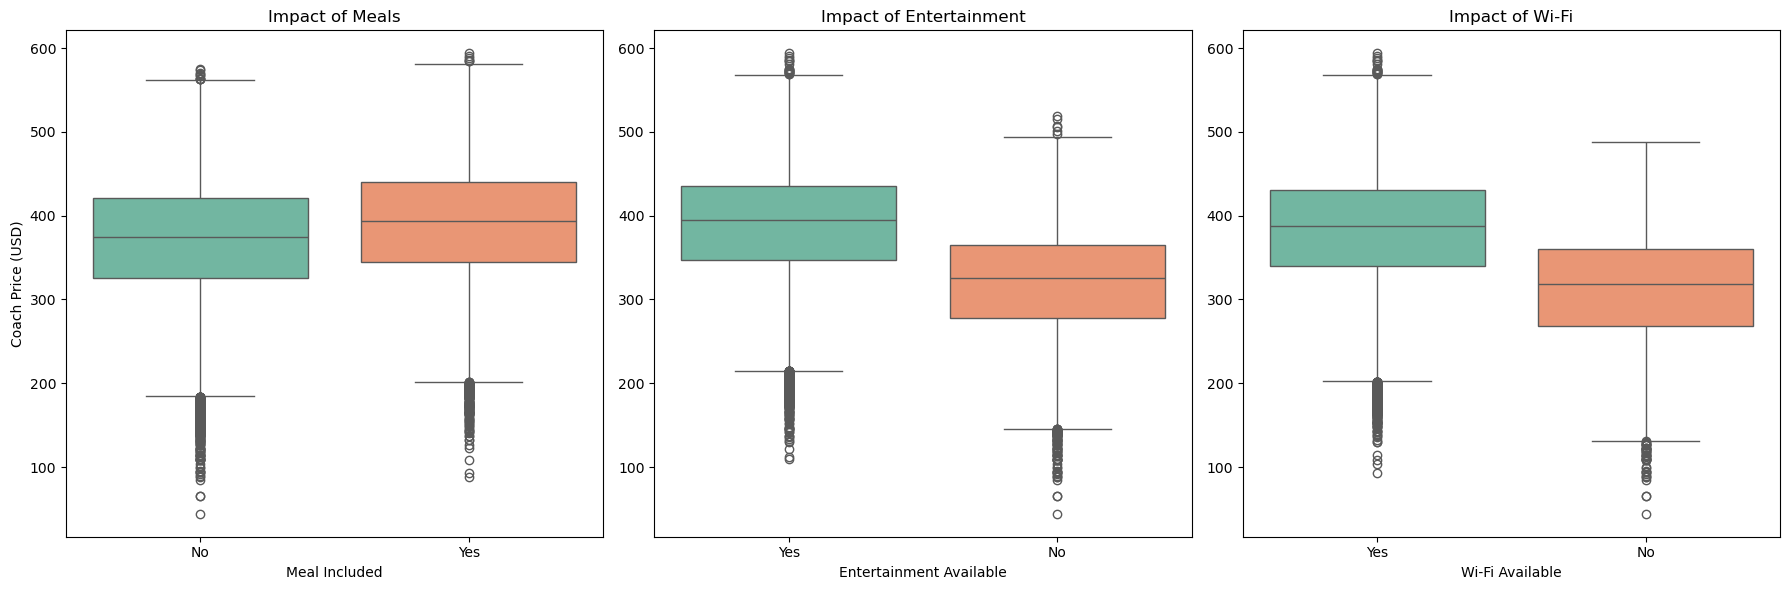

In [23]:
plt.figure(figsize=(18, 6))

# Subplot 1
plt.subplot(1, 3, 1)
sns.boxplot(x='inflight_meal', y='coach_price', data=flight, hue='inflight_meal', palette='Set2', legend=False)
plt.title('Impact of Meals')
plt.xlabel('Meal Included')
plt.ylabel('Coach Price (USD)')

# Subplot 2
plt.subplot(1, 3, 2)
sns.boxplot(x='inflight_entertainment', y='coach_price', data=flight, hue='inflight_entertainment', palette='Set2', legend=False)
plt.title('Impact of Entertainment')
plt.xlabel('Entertainment Available')
plt.ylabel('') # Leave empty if y-axis is the same as the first plot for a cleaner look

# Subplot 3
plt.subplot(1, 3, 3)
sns.boxplot(x='inflight_wifi', y='coach_price', data=flight, hue='inflight_wifi', palette='Set2', legend=False)
plt.title('Impact of Wi-Fi')
plt.xlabel('Wi-Fi Available')
plt.ylabel('')

plt.tight_layout()
plt.show()

### 💡 Insights: The "Premium" of Amenities

**Minor Value (Meals):** 

There is a negligible price difference for flights with meals. This suggests that meal costs are likely standard across most routes and not a primary driver of ticket price.

**Significant Value (Entertainment & Wi-Fi):** 

We see a distinct upward shift in the median price for flights offering Wi-Fi and Entertainment. 

**Agency Recommendation:** 

For **Economy Travelers**: We can save them the most money by specifically searching for flights that lack Wi-Fi/Entertainment, as these amenities carry a clear price premium.

For **Business Travelers**: Since the price jump is visible but not extreme, we can justify the higher cost by emphasizing the productivity gains of having Wi-Fi.

## Phase 6: Operational Analysis - Flight Duration vs. Passenger Capacity
Understanding the relationship between flight hours and passenger volume helps our agency predict the "type" of aircraft typically used on specific routes. This insight allows us to advise clients on likely cabin sizes and potential crowding on long-haul vs. short-haul flights.

### Analytical Goals:
* Determine if flight duration influences the average number of passengers.
* Visualize the density of passenger loads across different flight lengths using jittered scatter plots to manage data overlap.


<Figure size 1200x700 with 0 Axes>

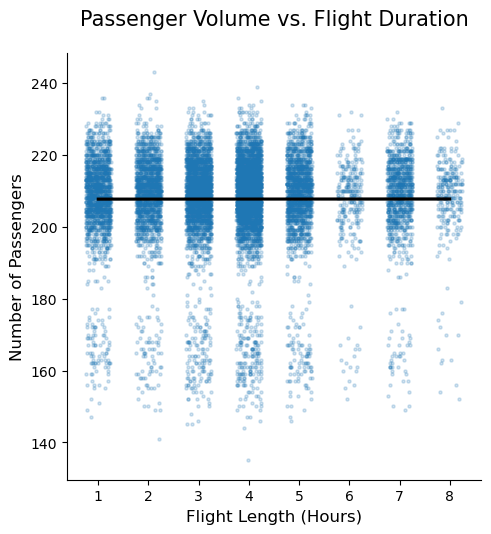

In [26]:
# Task 6: Relationship between Flight Length and Passenger Volume
# Using the subset (flight_sub) created in Task 4 to ensure performance
plt.figure(figsize=(12, 7))

sns.lmplot(x="hours", y="passengers", data=flight_sub, 
           x_jitter=0.25, 
           scatter_kws={"s": 5, "alpha": 0.2}, 
           line_kws={"color": "black"})

# Adding Labels and Title
plt.title("Passenger Volume vs. Flight Duration", fontsize=15, pad=20)
plt.xlabel("Flight Length (Hours)", fontsize=12)
plt.ylabel("Number of Passengers", fontsize=12)

plt.show()

### 📊 Insights: Capacity Trends

* **Consistency in Volume:** The regression line (black) remains relatively flat, indicating that the airline maintains a consistent passenger load regardless of whether the flight is 1 hour or 8 hours.
* **Aircraft Utilization:** Most flights appear to cluster between **180 and 220 passengers**. This suggests the airline utilizes similar-sized narrow-body or mid-size aircraft for the majority of these routes.
* **The "Jitter" Advantage:** By adding a small amount of horizontal "jitter" and transparency, we can see the true density of flights. Even though the hours are integers, the "clouds" of data reveal that mid-range flights (3–5 hours) are the most frequent in our dataset.

## Multivariate Analysis

## Phase 7: Multivariate Analysis - The "Weekend Premium" Effect
A critical factor in airline revenue management is the distinction between business travel (weekday) and leisure travel (weekend). In this section, we analyze how the relationship between Coach and First-Class prices shifts depending on the day of the week.

### Analytical Goals:
* Compare the pricing "slope" for weekends vs. weekdays.
* Quantify the "Weekend Premium" to help clients decide if shifting their travel dates could result in significant savings.


Text(0.5, 1.0, 'Correlation Analysis: Weekend vs. Weekday Tiers')

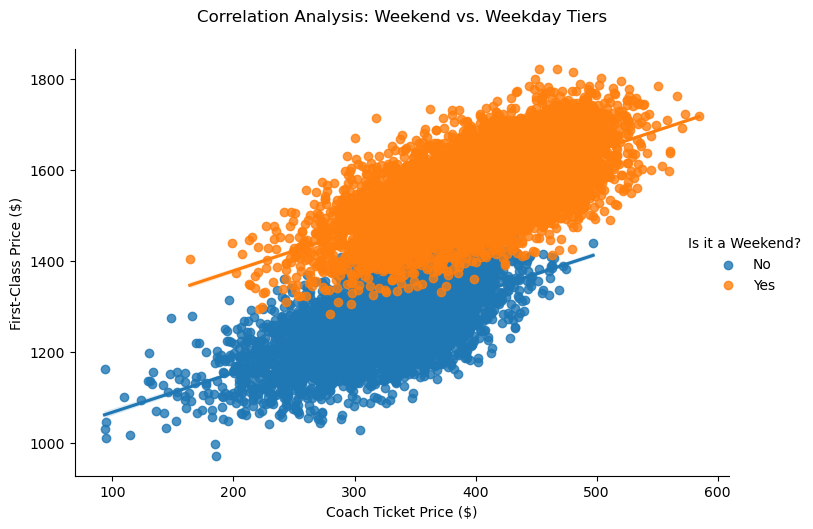

In [34]:
g = sns.lmplot(x='coach_price', y='firstclass_price', hue='weekend', data=flight_sub, aspect=1.5)

# Clean labels
g.set_axis_labels("Coach Ticket Price ($)", "First-Class Price ($)")
g._legend.set_title("Is it a Weekend?")
new_labels = ['No', 'Yes']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

plt.title("Correlation Analysis: Weekend vs. Weekday Tiers", pad=20)

### 🗓️ Insights: The Cost of Weekend Travel

* **Parallel Trends:** Both weekend and weekday prices follow a strong linear correlation. However, the **Weekend line (Yes)** is shifted vertically higher.

* **The Premium Gap:** For the same Coach price (e.g., $400), a First-Class ticket on the weekend is consistently more expensive than a First-Class ticket on a weekday.


* **Strategic Advice:** If a client is looking for a First-Class experience on a budget, we should strongly recommend **Tuesday or Wednesday departures**, where the "luxury premium" is statistically at its lowest.

## Phase 8: Multivariate Analysis - Redeye vs. Daytime Flight Pricing
The final step of our analysis is to determine how "Redeye" (overnight) flights impact pricing across the week. This information is vital for budget travelers who are willing to sacrifice comfort for cost savings.

### Analytical Goals:
* Identify if Redeye flights are consistently cheaper across all days of the week.
* Observe the "Day of Week" trend to see which days offer the highest and lowest variance in price.


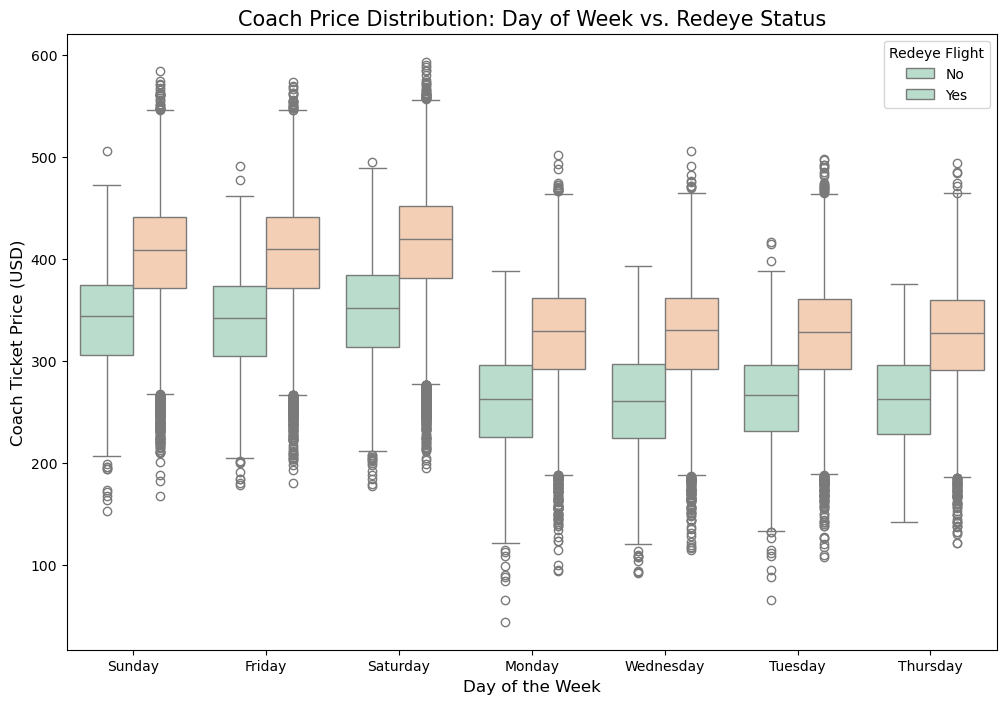

In [42]:
# Task 8: Coach Prices by Day of Week and Redeye Status
plt.figure(figsize=(12, 8))

# We use the full 'flight' dataset here because box plots handle large data well
sns.boxplot(x="day_of_week", y="coach_price", hue="redeye", data=flight, palette="Pastel2")

# Adding Professional Labels and Title
plt.title("Coach Price Distribution: Day of Week vs. Redeye Status", fontsize=15)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Coach Ticket Price (USD)", fontsize=12)

# Clean up the legend
plt.legend(title="Redeye Flight", labels=["No", "Yes"])

plt.show()

### ✈️ Final Insights: The Redeye Discount

* **Consistent Savings:** Across every day of the week, **Redeye flights (Yes)** have a lower median price than daytime flights. This confirms that overnight travel is a reliable way to save money regardless of the day.

* **Weekend Peak:** While Redeyes are cheaper, a **Saturday Redeye** is often still more expensive than a **Tuesday Daytime** flight. The "Weekend Effect" is stronger than the "Redeye Discount."

* **Price Stability:** The "whiskers" on the box plots show that price variance is fairly stable throughout the week, meaning our agency can provide consistent price estimates to clients.